# Деревья решений
Шестаков А.В., Панов А.И. Майнор по анализу данных 12/04/2016

На прошлых занятиях мы рассматривали **линейные** модели классификации и регрессии. Деревья решений - совсем другая история. Во-первых, потому что их можно использовать и для регрессии и для классификации, а во-вторых линейностью там только слегка веет.

Формально, деревья решений можно представить в виде вложенного набора правил "Если - То", но гораздо нагляднее изображать их именно в виде дерева.

Например, дерево может выглядеть так:

<img src='https://raw.githubusercontent.com/alexeygrigorev/wiki-figures/master/ufrt/kddm/decision-tree-ex-tit.png'>

Или вот так:

<img src='http://scikit-learn.org/stable/_images/iris.svg'>

### Классификация с деревьями решений

Давайте попробуем вспомнить, как они стоятся. Рассмотрим следующий набор данных


| ID | Refund | Marital Status | Income | Cheat
|-
| 1 | Yes | Single | 125K | No
| 2 | No | Married | 100K | No
| 3 | No | Single | 70K | No
| 4 | Yes | Married | 120K | No
| 5 | No | Divorced | 95K | Yes
| 6 | No | Married | 60K | No
| 7 | Yes | Divorced | 220K | No
| 8 | No | Single | 85K | Yes
| 9 | No | Married | 75K | No
| 10 | No | Single | 90K | Yes


Имеем 3 признака и класс *Cheat*. Нужно выбрать признак, который наилучшим образом дифференцирует между классами. Посчитать это можно с помощью Impurity Measures и прироста информации:

**Impurity Measures: (меры неравенства\неопределенности)**
* Gini index $I(S) = 1 - \sum\limits_k (p_k)^2$
* Entropy  $I(S) = -\sum\limits_k p_k \log(p_k)$
* Missclassification error  $I(S) = 1 - \max\limits_k p_k$

$p_k$ - доля класса $k$ в узле дерева $S$

**Прирост информации: (насколько уменьшится неопределенность)** <br/>
$$ Gain(S, A) = I(S) - \sum\limits_v\frac{|S_v|}{|S|}\cdot I(S_v),$$ где $A$ - это некий атрибут, а $v$ - его значения

Например, для нашей таблицы:
$$I(S) = -(\frac{3}{10}\log(\frac{3}{10}) + \frac{7}{10}\log(\frac{7}{10})) = 0.61$$

Возьмем, например, атрибут *Marital Status*

$$Gain(S, \text{'Marital Status'}) = I(S) - (\frac{4}{10}\cdot I(S_{single}) + \frac{2}{10}\cdot I(S_{divorced}) + \frac{4}{10}\cdot I(S_{married})) =  0.14$$

Проделаем тоже самое для остальных атрибутов..

In [1]:
import numpy as np

In [2]:
I_single = -(0.5*np.log2(0.5)+0.5*np.log2(0.5))
I_divorced = -(0.5*np.log2(0.5)+0.5*np.log2(0.5))
I_married = -(np.log2(1))
Gain = 0.88 - ((0.4*I_single)+(0.2*I_divorced)+(0.4*I_married))
Gain

0.27999999999999992

In [3]:
I_yes = -(1*np.log2(1))
I_no = -((3/7)*np.log2(3/7)+(4/7)*np.log2(4/7))
Gain_2 = 0.88 - (((3/10)*I_yes)+((7/10)*I_no))
Gain_2

0.19034030477602393

In [9]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

In [6]:
clf.predict([[2., 2.]])

array([1])

In [7]:
clf.predict_proba([[2., 2.]])

array([[ 0.,  1.]])

In [13]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)

### Как посмотреть на деревья?

In [19]:
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value
get_code(clf, iris.feature_names)

In [21]:
def recurse(node, counter):
    if (threshold[node] != -2):
        if left[node] != -1:
            print(' '*counter + 'if ('+ features[node] + '>' + str(threshold[node]) +'){')
            recurse(left[node])
            print('}else{')
        if right[node] != -1:
            print(' '*counter + 'if ('+ features[node] + '<' + str(threshold[node]) +'){')
            recurse(right[node])
            print('}else{')
    else:
            print('return' + str(value[node]))
recurse(0,0)

NameError: name 'threshold' is not defined

In [15]:
from sklearn.externals.six import StringIO
with open("iris.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

Затем можно с помощью [Graphviz](http://www.graphviz.org/Download..php) создать pdf или другой поддерживаемый тип файла: `dot -Tpdf iris.dot -o iris.pdf`

In [7]:
from sklearn.externals.six import StringIO  
import pydot 
dot_data = StringIO() 
tree.export_graphviz(clf, out_file=dot_data) 
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf")

ImportError: No module named 'pydot'

In [8]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

NameError: name 'pydot' is not defined

In [9]:
clf.predict(iris.data[:1, :])

array([0])

In [10]:
clf.predict_proba(iris.data[:1, :])

array([[ 1.,  0.,  0.]])

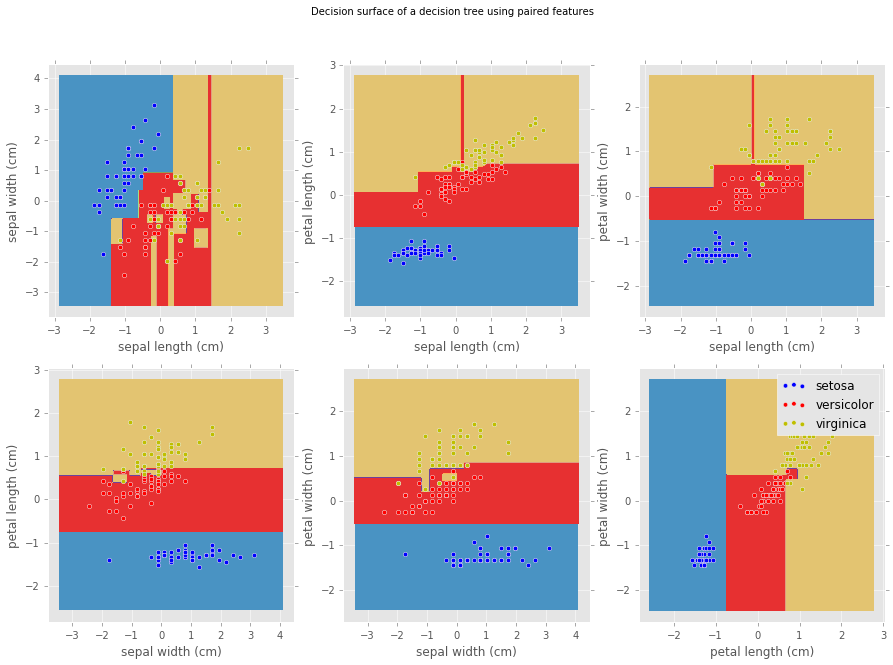

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()
plt.rcParams["figure.figsize"] = [15,10]

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Shuffle
    idx = np.arange(X.shape[0])
    np.random.seed(13)
    np.random.shuffle(idx)
    X = X[idx]
    y = y[idx]

    # Standardize
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X = (X - mean) / std

    # Train
    clf = tree.DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

### Регрессия с деревьями решений

В этом случае всё очень похоже, с той разницой, что мы будем пытаться уменьшить среднюю квадратичную ошибку
$$I(S) = \frac{1}{|S|} \sum\limits_{i \in S} (y_i - c)^2 $$ 
$$ c = \frac{1}{|S|}\sum\limits_{i \in S} y_i $$

In [55]:
from sklearn import tree
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)
clf.predict([[1, 1]])

array([ 0.5])

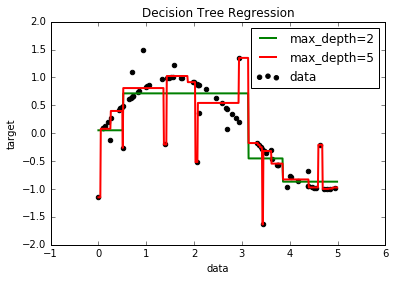

In [65]:
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = tree.DecisionTreeRegressor(max_depth=2)
regr_2 = tree.DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="data")
plt.plot(X_test, y_1, c="g", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, c="r", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

### Перейдем к заданию

Загрузите [данные](https://www.dropbox.com/s/3t1moa1wpflx2u9/california.dat?dl=0).

**Задание 1:** Найти оптимальную глубину дерева.<br/>
Разделите выборку на train-test в пропорции 70/30.<br/>
Обучите деревья с глубиной от `1` до `30`. Для каждой глубины расчитайте среднюю квадратичную ошибку на train и на test<br/>
Изобразите эти ошибки на одном графике, сделайте вывод по поводу оптимальной глубины дерева.

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import pylab as plt
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('california.dat')
df.head()

,Longitude,Latitude,HousingMedianAge,TotalRooms,TotalBedrooms,Population,Households,MedianIncome,MedianHouseValue
0,-117.03,32.78,17,5481,1618,2957,1537,2.5707,171300
1,-118.23,33.80,26,239,135,165,112,1.3333,187500
2,-122.46,37.71,39,2076,482,1738,445,3.1958,232100
3,-122.06,37.94,19,4005,972,1896,893,2.5268,235700
4,-122.87,38.68,32,4073,718,2053,629,3.7352,228000


In [3]:
train, test = train_test_split(df, test_size = 0.3)
X_train = train[['Longitude', 'Latitude', 'HousingMedianAge', 'TotalRooms', 'TotalBedrooms', 'Population', 'Households', 'MedianIncome']]
y_train = train['MedianHouseValue']
X_test = test[['Longitude', 'Latitude', 'HousingMedianAge', 'TotalRooms', 'TotalBedrooms', 'Population', 'Households', 'MedianIncome']]
y_test = test['MedianHouseValue']

In [4]:
MSE_test = []
MSE_train = []
for i in range(1, 31):
    Tree = tree.DecisionTreeRegressor(max_depth = i)
    Tree.fit(X_train, y_train)
    predicted_test = Tree.predict(X_test)
    predicted_train = Tree.predict(X_train)
    MSE_test.append(mean_squared_error(predicted_test, y_test))
    MSE_train.append(mean_squared_error(predicted_train, y_train))

In [5]:
print(MSE_test)

[9608242875.4183712, 7658966428.4562111, 6995249999.4996185, 6172472281.0590982, 5677077967.8131714, 5158805435.9682884, 4744101833.5463638, 4360991733.994916, 4115897939.5035977, 4128299615.8579264, 4087154618.067246, 4219325594.1575131, 4396625193.0111713, 4499052141.3587627, 4693553289.1850243, 4669523698.0830593, 4718508393.9619255, 4891884011.0797062, 4750775402.2795763, 4811186618.5854073, 4847731517.7896309, 4879713816.7595034, 4859472996.5387659, 4971037181.8668661, 4829111754.123024, 5026336198.9154272, 4833082435.1258068, 4937711244.4599161, 4785760176.9980888, 4952433260.5608854]


In [6]:
print('Оптимальная глубина дерева для test:', np.argmin(MSE_test) + 1)
print('Оптимальная глубина дерева для train:', np.argmin(MSE_train) + 1)

Оптимальная глубина дерева для test: 11
Оптимальная глубина дерева для train: 30


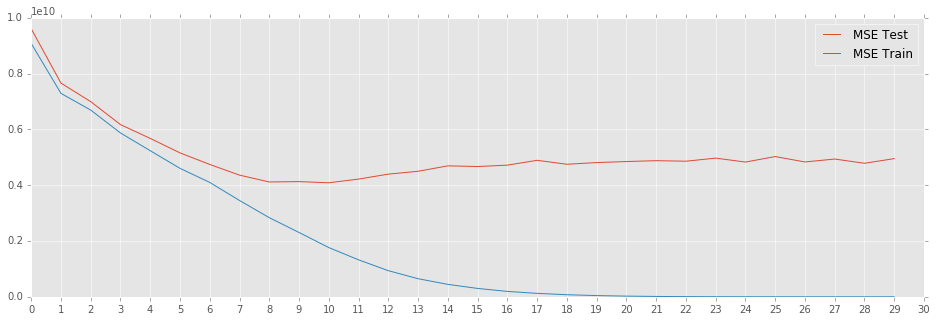

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline 

df1 = pd.DataFrame({'MSE Test': MSE_test, 'MSE Train': MSE_train})
x = np.arange(31)
df1.plot.line(xticks = x, figsize = (16,5))


**Задание 2:** Выведите важности признаков. Для этого воспользуйтесь `DecisionTreeRegressor.feature_importances_`

In [45]:
importances = tree.DecisionTreeRegressor().fit(X_train, y_train).feature_importances_

for j in range(len(df.columns) - 1):
    print(df.columns[j])
    print(importances[j])
    print('------------')


Longitude
0.163740230642
------------
Latitude
0.174204776671
------------
HousingMedianAge
0.0635412957278
------------
TotalRooms
0.0239720383466
------------
TotalBedrooms
0.0185164490615
------------
Population
0.0252743576049
------------
Households
0.0201308556142
------------
MedianIncome
0.510619996332
------------


**Задание 3:** Поразмышляйте на темы:
* Обработки пропусков в данных.
* Как сделать разделяющие плоскости непараллельные осям?

Существует несколько способов улучшить модель, если в данных встречаются пропуски, например:
 - 1)Удаление - используется в больших массивах данных, т.к. можно пренебречь удалёнными данными
 - 2)Замена на среднее, медиану. Используется, когда удаление данных нежелательно ввиду небольшого массива данных
 - 3)Заполнение пропусков с помощью построения модели (предскзаания). Т.е. использование, например, регрессии не для целевой модели, а для заполнения пропуска. Самый ресурсоёмкий способ.

Чтобы сделать разделяющие плоскости непараллельными осям, можно использовать Multivariate tree. В этом случае, дерево проверяет не простое условие x<2, а сразу несколько признаков, например x+y<2. Если рассмотреть случай двух признаков, то в координатах этих признаков разделящую плоскость будет выражаться уравнением y=2-x, т.е. она будет непараллельна осям.